In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/yelp_dataset/yelp_reviews_restaurant_category_az.csv')
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,attributes,categories,user_id,review_stars,useful,funny,cool,text,date,number_of_reviews
0,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741.0,32.338572,-111.01076,4.0,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",q44_w_oVQg698KWPlKw7XA,5.0,0.0,0.0,0.0,Just tried Papa Murphy's for first time last n...,2015-11-20 16:32:27,3.0
1,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741.0,32.338572,-111.01076,4.0,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",cZtDleoAeanFLmsUc4zdDg,5.0,0.0,0.0,0.0,Delicious and fresh. Recommend for a party or ...,2018-02-04 22:24:29,1.0
2,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741.0,32.338572,-111.01076,4.0,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",AWSvGe4eGZJIns5MUxvsZQ,5.0,0.0,0.0,0.0,Today my sister and I received excellent custo...,2015-07-30 01:26:19,1.0
3,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741.0,32.338572,-111.01076,4.0,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",_rvtejG1xx6ALnpx77xjlw,5.0,1.0,0.0,0.0,I have been to all of the papa Murphy's in the...,2012-05-06 16:34:49,9.0
4,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741.0,32.338572,-111.01076,4.0,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",VJDBpYUc-ijCl_UmFh2h-Q,4.0,4.0,0.0,0.0,This has become one of our favorite places to ...,2010-01-31 21:13:51,34.0


## Preprocessing the Reviews and Topic Modelling with LDA

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('wordnet') #new line added
nltk.download('omw-1.4') #new line added

# Tokenize, remove punctuation, make lowercase, remove stopwords
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() #new line added

#new code block added
def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [w for w in tokens if w not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(w) for w in filtered_tokens]
    return lemmatized_tokens

#def preprocess(text):
#    tokens = tokenizer.tokenize(text.lower())
#    filtered_tokens = [w for w in tokens if not w in stop_words]
#    return filtered_tokens

df['processed_text'] = df['text'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [6]:
from gensim import corpora, models
from nltk.tokenize import RegexpTokenizer

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['processed_text'])

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Convert dictionary into a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]

# Train the LDA model
lda_model = models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=10, workers=2)

# Print the topics identified by LDA
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Topic: 0 
Words: 0.038*"breakfast" + 0.035*"coffee" + 0.018*"egg" + 0.013*"pancake" + 0.011*"bacon" + 0.010*"good" + 0.010*"delicious" + 0.009*"toast" + 0.009*"cream" + 0.008*"chocolate"

Topic: 1 
Words: 0.058*"pizza" + 0.037*"salad" + 0.029*"sandwich" + 0.025*"bread" + 0.023*"cheese" + 0.014*"good" + 0.012*"sauce" + 0.012*"chicken" + 0.010*"italian" + 0.010*"pasta"

Topic: 2 
Words: 0.032*"chicken" + 0.020*"sauce" + 0.015*"good" + 0.015*"rice" + 0.014*"dish" + 0.013*"fried" + 0.013*"flavor" + 0.012*"ordered" + 0.011*"pork" + 0.011*"spicy"

Topic: 3 
Words: 0.052*"great" + 0.036*"service" + 0.024*"place" + 0.021*"friendly" + 0.018*"back" + 0.017*"good" + 0.017*"staff" + 0.017*"time" + 0.017*"amazing" + 0.016*"delicious"

Topic: 4 
Words: 0.013*"room" + 0.013*"restaurant" + 0.009*"menu" + 0.008*"table" + 0.007*"dinner" + 0.007*"dining" + 0.007*"wine" + 0.005*"night" + 0.005*"well" + 0.005*"u"

Topic: 5 
Words: 0.016*"good" + 0.015*"burger" + 0.015*"like" + 0.012*"ordered" + 0.011*"woul

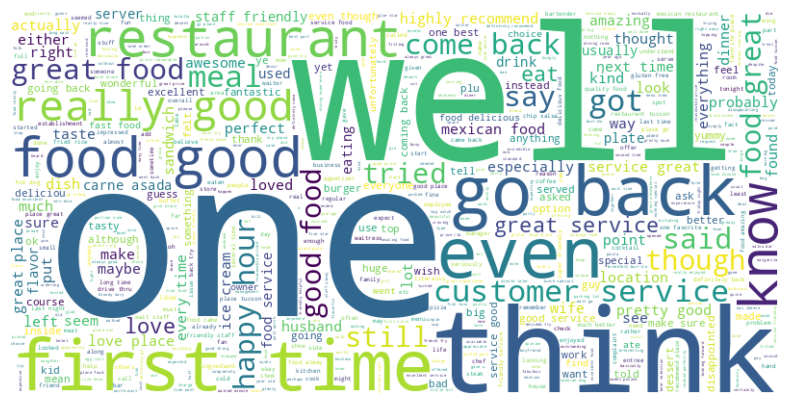

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

all_reviews = ' '.join([' '.join(tokens) for tokens in df['processed_text']])

# Define additional stopwords if necessary
additional_stopwords = set(STOPWORDS)

# Create the word cloud object
wordcloud = WordCloud(stopwords=additional_stopwords, background_color="white", max_words=1000, width=800, height=400)

# Generate the word cloud
wordcloud.generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Topic Modelling with Bert

In [ ]:
!pip install transformers

In [ ]:
df.dropna(subset=['processed_text'], inplace=True)
df = df[df['processed_text'].str.strip().astype(bool)]

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Initialize BERT tokenizer and model from the pre-trained 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Move model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Revised function to encode list of texts individually using BERT tokenizer and model
def encode_texts_one_by_one(texts, model, tokenizer):
    embeddings = []
    for text in texts:
        if text:  # ensure text is not empty
            encoded_dict = tokenizer.encode_plus(
                text,                      # Text to encode
                add_special_tokens=True,   # Add '[CLS]' and '[SEP]'
                max_length=64,            # Pad & truncate all sentences
                padding='max_length',      # Pad all to max_length
                return_attention_mask=True,# Construct attention masks
                return_tensors='pt',       # Return PyTorch tensors
                truncation=True            # Truncate to max_length
            ).to(device)
            input_ids = encoded_dict['input_ids']
            attention_mask = encoded_dict['attention_mask']

            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask)
                embedding = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
                embeddings.append(embedding.squeeze())
        else:
            embeddings.append(np.zeros(model.config.hidden_size))  # Placeholder for empty texts

    embeddings = np.array(embeddings)
    return embeddings

texts = df['processed_text'].apply(' '.join).tolist()  # Convert tokens back to strings
embeddings = encode_texts_one_by_one(texts, model, tokenizer)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)
reduced_embeddings = pca.fit_transform(embeddings)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(reduced_embeddings)
clusters = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['topic'] = clusters

# Print the top texts from each topic
for cluster_num in range(4):
    print(f"Cluster {cluster_num} texts:")
    cluster_texts = df[df['topic'] == cluster_num]['processed_text'].head(10).tolist()
    for text in cluster_texts:
        print(text)
    print("\n")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 texts:
['fresh', 'affordable', 'delicious', 'got', 'gourmet', 'garlic', 'chicken', 'perfection', 'boyfriend', 'suggested', 'saying', 'favorite', 'papa', 'murphy', 'first', 'time', 'quickly', 'become', 'favorite', 'usually', 'chicken', 'pizza', 'fan', 'garlic', 'sauce', 'tastebud', 'quickly', 'swayed', 'like', 'said', 'first', 'papa', 'murphy', 'experience', 'walked', 'store', 'pizza', 'look', 'expecting', 'anything', 'spectacular', 'ala', 'tastebud', 'quickly', 'swayed', 'new', 'papa', 'murphy', 'fan', 'right']
['guy', 'completed', 'pizza', 'nice', 'friendly', 'unfortunately', 'pocketed', '4', 'change', 'gave', '29', 'cent', 'back', 'talk', 'enough', 'notice', '4', 'missing', 'got', 'home', 'also', 'salad', 'picked', 'thinking', 'fresh', 'brown', 'tomato', 'pepper', 'old', 'tasted', 'funny', 'slimy', 'touch', 'pizza', 'good', 'also', 'purchased', 'more', 'pizza', 'good', 'well', 'next', 'time', 'going', 'cautious', 'selecting', 'talking']
['purchased', 'tuesday', 'special', '

In [ ]:
from collections import Counter

# Function to display most common words in each cluster
def display_cluster_keywords(df, num_clusters=4, num_keywords=10):
    for cluster_num in range(num_clusters):
        cluster_texts = df[df['topic'] == cluster_num]['processed_text'].tolist()
        all_words = [word for text in cluster_texts for word in text]
        most_common = Counter(all_words).most_common(num_keywords)
        print(f"Cluster {cluster_num} common words: {[word for word, count in most_common]}")
        print("\n")

display_cluster_keywords(df)

Cluster 0 common words: ['food', 'place', 'time', 'good', 'one', 'like', 'get', 'order', 'service', 'u']


Cluster 1 common words: ['food', 'great', 'good', 'service', 'place', 'delicious', 'best', 'amazing', 'love', 'tucson']


Cluster 2 common words: ['food', 'good', 'place', 'great', 'like', 'time', 'one', 'ordered', 'service', 'also']


Cluster 3 common words: ['food', 'place', 'good', 'great', 'service', 'time', 'back', 'go', 'get', 'always']




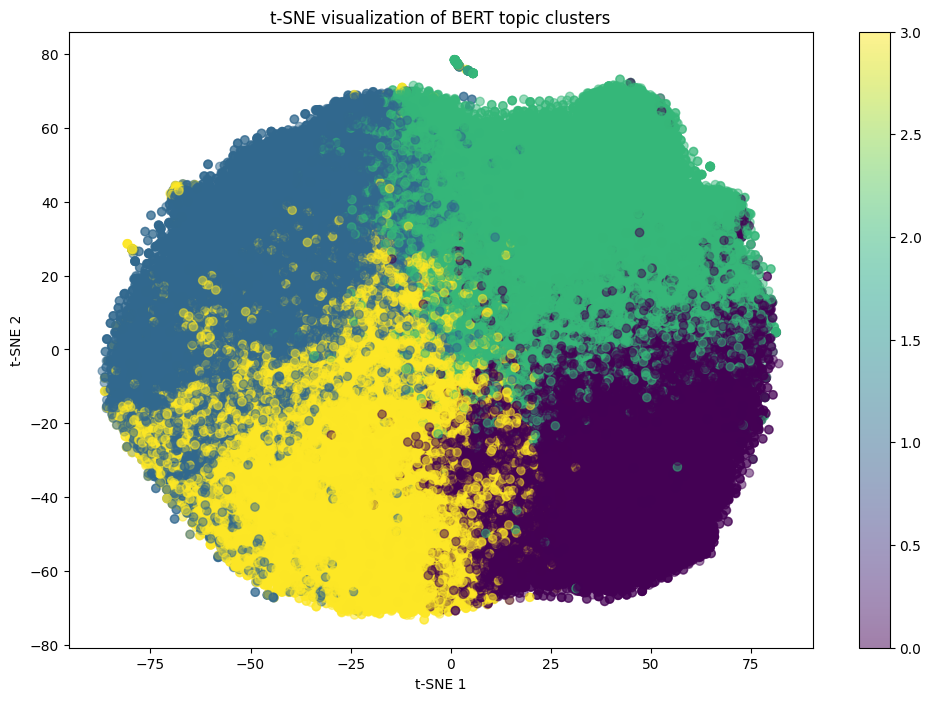

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Use t-SNE to reduce embeddings to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(reduced_embeddings)

# Plot the reduced embeddings with cluster labels
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("t-SNE visualization of BERT topic clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

## Sentiment Analysis

In [ ]:
!pip install -q vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


analyzer = SentimentIntensityAnalyzer()

df['vader_sentiment'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])



In [ ]:
results_df = pd.DataFrame(df)

# Round the 'score' column to 4 decimal places
results_df['score'] = results_df['vader_sentiment'].round(4)

# Select and print the first 20 rows
print(results_df[['text', 'vader_sentiment']].head(20))

                                                 text  vader_sentiment
0   Just tried Papa Murphy's for first time last n...           0.7845
1   Delicious and fresh. Recommend for a party or ...           0.9750
2   Today my sister and I received excellent custo...           0.9818
3   I have been to all of the papa Murphy's in the...           0.9545
4   This has become one of our favorite places to ...           0.9876
5   This is the best pizza place in Oro valley! It...           0.9450
6   Fresh, affordable, and delicious! We got the G...           0.9289
7   I'm going to give a relatively rare (for me) 5...           0.9931
8   Can I just stop for a moment and pay homage to...           0.9032
9   The guy that completed my pizza was nice and v...           0.9473
10  This place has been awesome, they seem to turn...           0.7894
11  It is what it is, an uncooked pizza with raw i...           0.8495
12  The worst service we have had in a long time a...          -0.8439
13  Wo

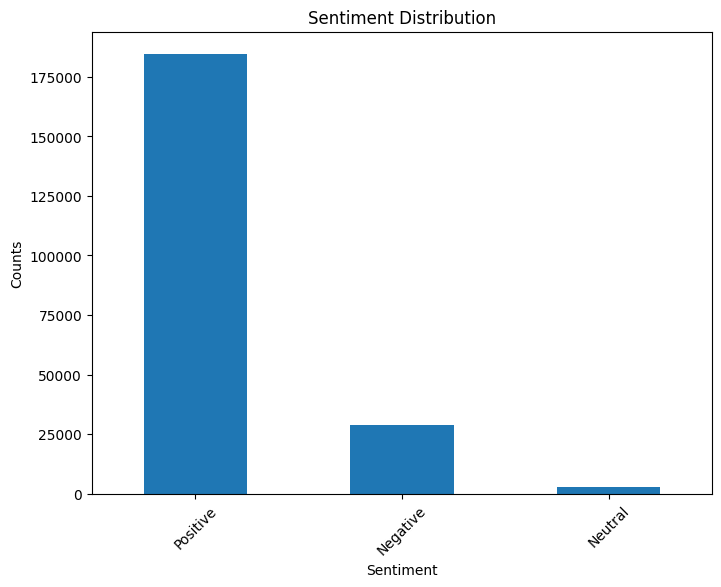

In [ ]:
results_df['sentiment_category'] = pd.cut(results_df['vader_sentiment'],
                                          bins=[-1, -0.05, 0.05, 1],
                                          labels=["Negative", "Neutral", "Positive"])

# Plotting the sentiment distribution
sentiment_counts = results_df['sentiment_category'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

Word Cloud for Positive Sentiment


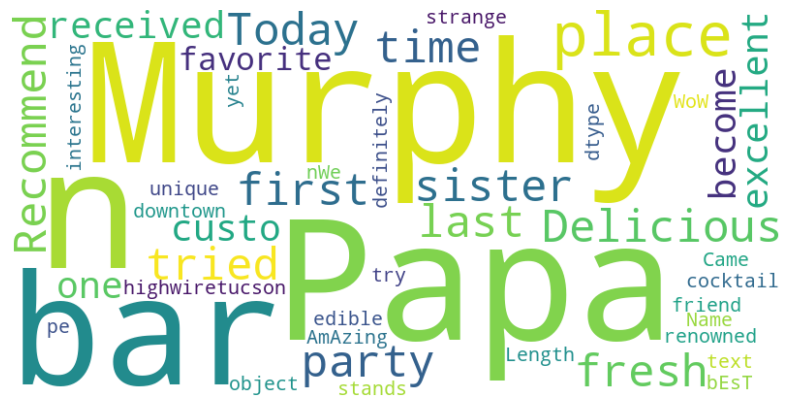

Word Cloud for Negative Sentiment


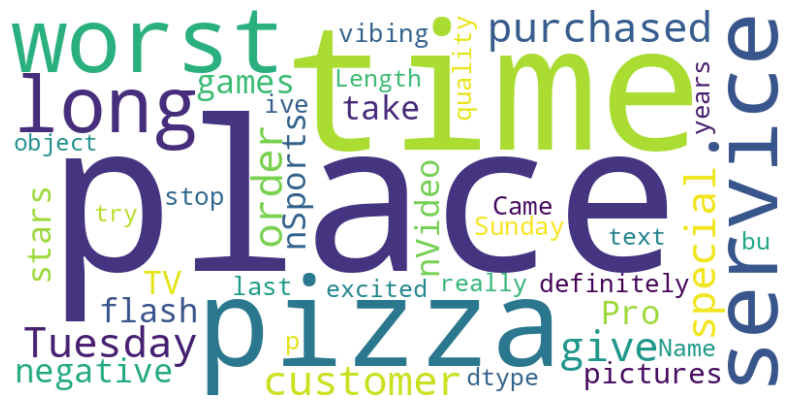

Word Cloud for Neutral Sentiment


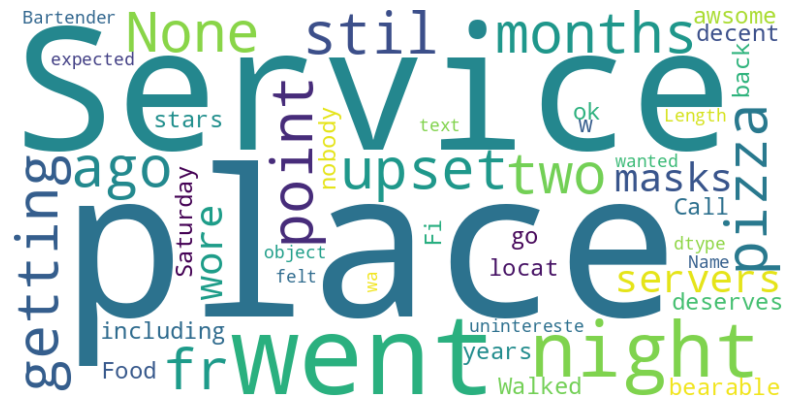

In [ ]:
from wordcloud import WordCloud
def generate_wordcloud(data):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(str(data))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment category
for category in results_df['sentiment_category'].unique():
    print(f"Word Cloud for {category} Sentiment")
    subset = results_df[results_df['sentiment_category'] == category]['text']
    generate_wordcloud(subset)

## ML Models: Regression and Classfication

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame
features_reg = ['number_of_reviews', 'useful', 'funny', 'cool', 'stars']
X_reg = df[features_reg]
y_reg = df['review_stars']

# Splitting the dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluation
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error for Regression: {mse_reg}")

# Business Insights from Regression Model
coefficients = pd.DataFrame(reg_model.coef_, features_reg, columns=['Coefficient'])
print(coefficients)


Mean Squared Error for Regression: 1.5790409205750986
                   Coefficient
number_of_reviews     0.000840
useful               -0.217592
funny                -0.227933
cool                  0.410301
stars                 0.861286


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Creating a binary target variable for classification
df['high_rating'] = (df['stars'] >= 4).astype(int)
features_class = ['number_of_reviews', 'useful', 'funny', 'cool']
X_class = df[features_class]
y_class = df['high_rating']

# Splitting the dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Random Forest Classifier
class_model = RandomForestClassifier(random_state=42)
class_model.fit(X_train_class, y_train_class)
y_pred_class = class_model.predict(X_test_class)

# Evaluation
accuracy_class = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy for Classification: {accuracy_class}")

# Business Insights from Classification Model
feature_importances = pd.DataFrame(class_model.feature_importances_, index=features_class, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)


Accuracy for Classification: 0.5841920428815673
                   Importance
number_of_reviews    0.554330
cool                 0.182574
useful               0.174971
funny                0.088125


### Insights from Regression Model
- **Positive Influence of `stars` on Review Stars:** The coefficient of 0.861286 for `stars` indicates a strong positive relationship with the review stars. This suggests that the overall rating of a business is a significant predictor of individual review ratings. In practice, improving the overall quality of service and customer satisfaction could lead to higher individual review ratings.
- **Impact of Engagement Metrics (`useful`, `funny`, `cool`):** The negative coefficients for `useful` (-0.217592) and `funny` (-0.227933) suggest that reviews marked as useful or funny are associated with slightly lower review stars, perhaps indicating that customers are more likely to engage with reviews (in terms of finding them useful or funny) when they highlight issues or have mixed feelings. In contrast, `cool` has a positive coefficient (0.410301), indicating that reviews marked as cool, which might reflect a positive sentiment or unique experiences, are associated with higher review ratings.
- **Minimal Impact of `number_of_reviews`:** The small positive coefficient (0.000840) for `number_of_reviews` suggests that the sheer volume of reviews has a very minimal positive impact on individual review stars. This indicates that while having more reviews is slightly beneficial, the focus should be on quality and satisfaction rather than merely increasing review counts.

### Insights from Classification Model
- **Significant Role of `number_of_reviews`:** With the highest importance score (0.554330), the number of reviews is the most significant predictor of whether a business is classified as high-rated. This could suggest that businesses with more reviews are generally perceived as more reputable or have had more opportunities to refine their service based on customer feedback, thus achieving a higher overall rating.
- **Importance of Engagement (`cool`, `useful`):** The engagement metrics `cool` and `useful` also play a significant role in predicting high-rated businesses, with importance scores of 0.182574 and 0.174971, respectively. This reinforces the idea that engaging positively with customers and providing services or experiences that customers find useful or cool can contribute to a higher overall business rating.
- **Lesser Importance of `funny`:** The lower importance of `funny` (0.088125) in classification suggests that humor in reviews is less indicative of a business's overall rating category. This may imply that while humor can make reviews more engaging or memorable, it's not a strong predictor of business quality as perceived by customers.

### Conclusions and Recommendations
- **Focus on Quality and Customer Satisfaction:** Improving the overall quality of service and ensuring customer satisfaction are key to achieving higher individual review ratings and overall business ratings.
- **Engage Positively with Customers:** Encouraging positive engagement through useful and enjoyable experiences can significantly impact how customers perceive and rate your business.
- **Monitor and Utilize Feedback:** The volume of reviews is important, but focusing on the content and feedback within those reviews is crucial for continuous improvement.
- **Quality Over Quantity:** While having a higher number of reviews is beneficial, the results emphasize the importance of the quality of those reviews and the experiences they reflect.

Improving in these areas can not only enhance individual review ratings but also contribute to a higher overall rating, which is critical for attracting new customers and retaining existing ones.